# Preprocessing

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

### Step 1:
- Import the boston house dataset from `sklearn.datasets`. 

`from sklearn.datasets import load_boston`

`boston = load_boston()`

- Create train and test datasets. 

- Check the data description and familiarize yourself with the data.

In [53]:
# sklearn no longer has Boston housing dataset due to ethical concerns. Have to download .csv file from Kaggle, instead
boston = pd.read_csv(r"C:\Users\BalintStewart\OneDrive - Health Data Research\Desktop\magnimind-assignments\ML_preprocessing_module\data\HousingData.csv")
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [54]:
#Find the rows with missing values
missing = boston[boston.isna().any(axis=1)]
print(missing)

         CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD  TAX  \
4     0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622    3  222   
6     0.08829  12.5   7.87   NaN  0.524  6.012  66.6  5.5605    5  311   
9     0.17004  12.5   7.87   NaN  0.524  6.004  85.9  6.5921    5  311   
14    0.63796   0.0   8.14   NaN  0.538  6.096  84.5  4.4619    4  307   
35    0.06417   0.0   5.96   0.0  0.499  5.933  68.2  3.3603    5  279   
..        ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
473   4.64689   0.0  18.10   0.0  0.614  6.980  67.6  2.5329   24  666   
479  14.33370   0.0  18.10   NaN  0.614  6.229  88.0  1.9512   24  666   
482   5.73116   0.0  18.10   NaN  0.532  7.061  77.0  3.4106   24  666   
501   0.06263   0.0  11.93   0.0  0.573  6.593  69.1  2.4786    1  273   
505   0.04741   0.0  11.93   0.0  0.573  6.030   NaN  2.5050    1  273   

     PTRATIO       B  LSTAT  MEDV  
4       18.7  396.90    NaN  36.2  
6       15.2  395.60  12.43  22.9  
9  

In [55]:
boston.shape

(506, 14)

In [56]:
# Deal with missing values
boston.isna().sum()
boston = boston.dropna()

In [57]:
boston.shape

(394, 14)

In [58]:
X = boston.drop(['MEDV'], axis =1)
y = boston['MEDV']
X.shape

(394, 13)

In [59]:
X_col = X.iloc[:,0]

### Step 2:
Create a scatter plot of each attribute with the mean house price.

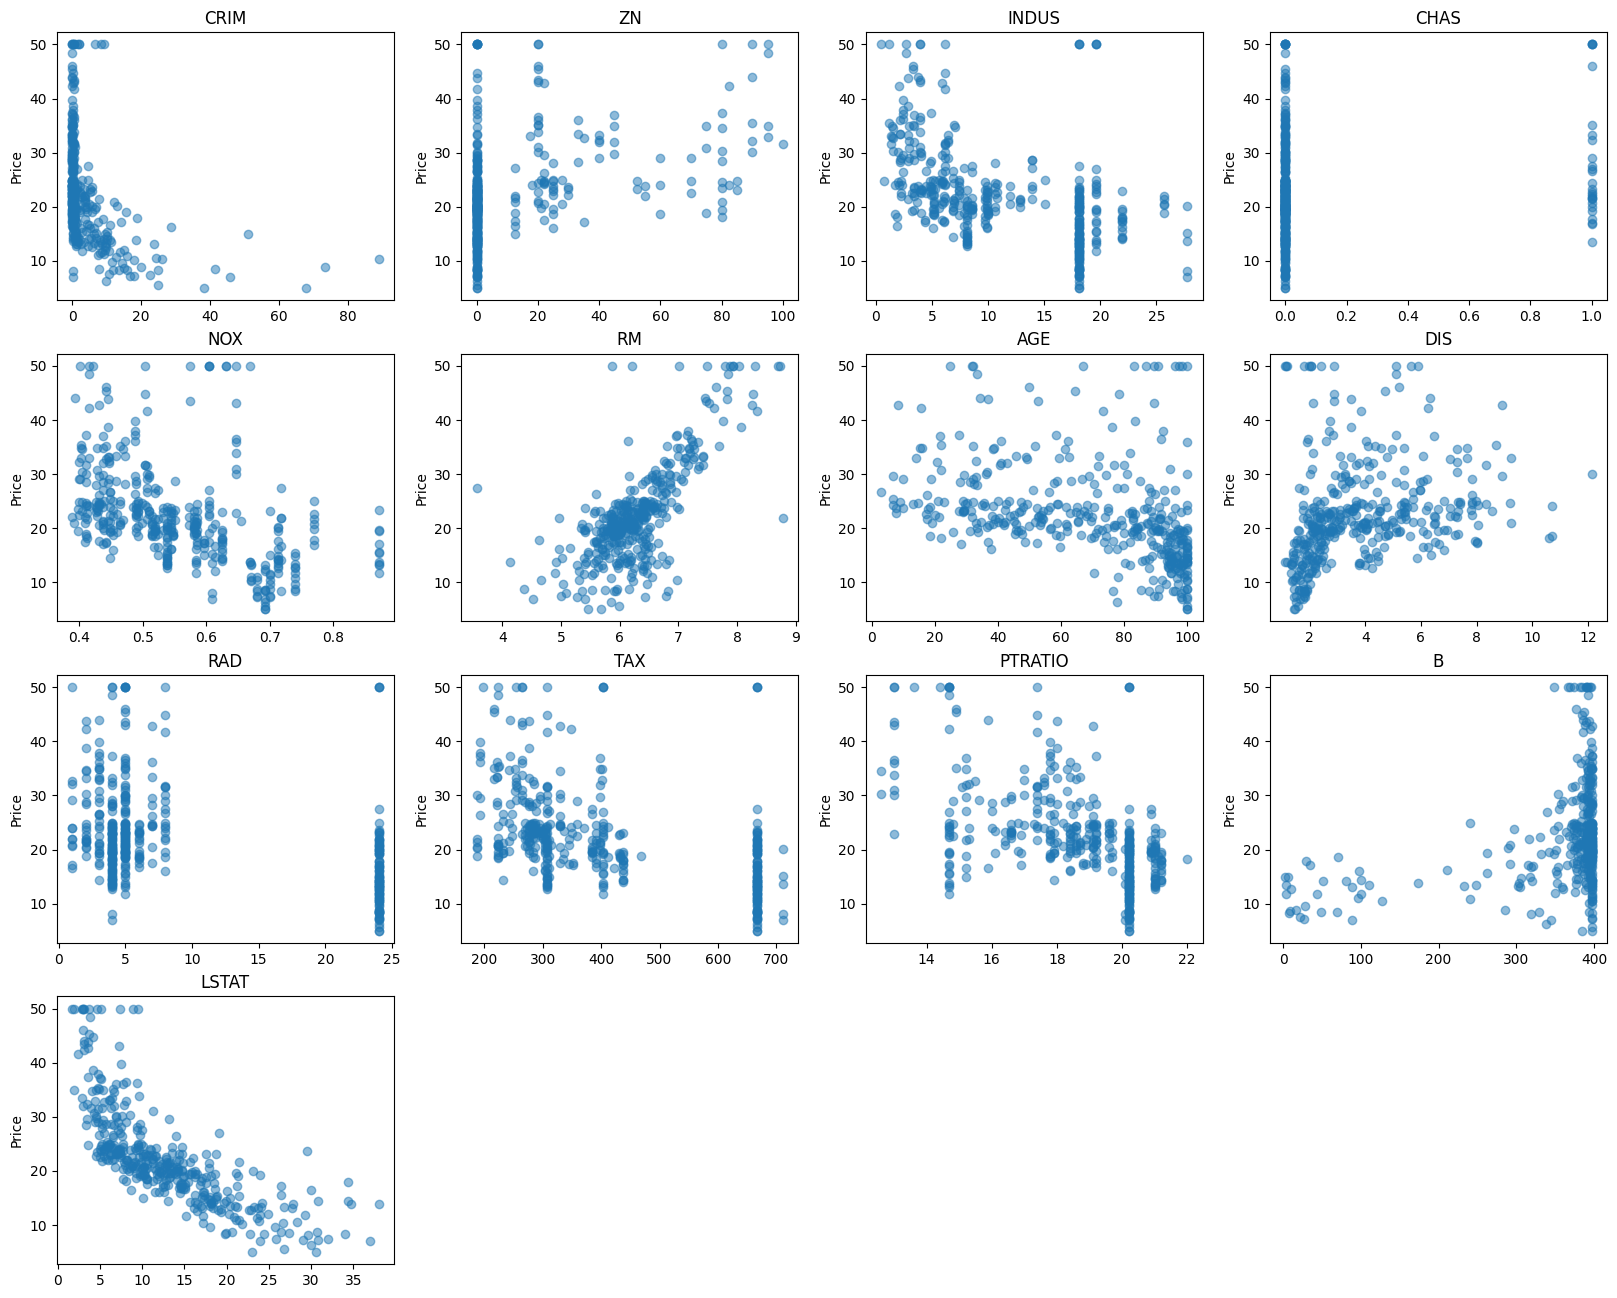

In [60]:
fig, axes = plt.subplots(4,4, figsize = (20,16))
axes.ravel()
for i, ax in enumerate(axes.ravel()):
    if i > 12:
        ax.set_visible(False) # turns the location of the axes object into a vector)
        continue
    X_col = X.iloc[:,i] # iterate through each column to take the X axis data to plot
    ax.scatter(X_col, y, alpha = 0.5)
    ax.set_title(f'{X.columns[i]}')
    ax.set_ylabel('Price')

### Step 3:
Create a box plot of all attributes.

<Axes: >

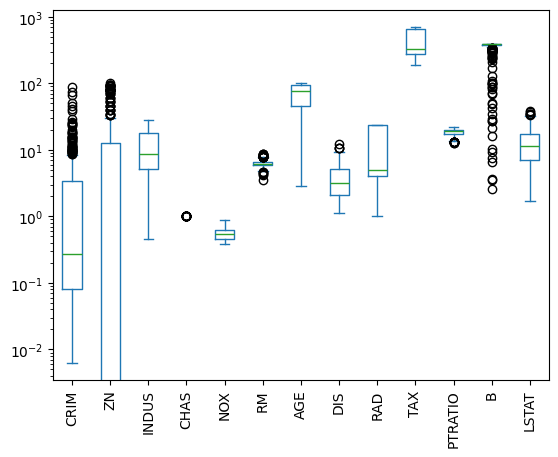

In [61]:
X.plot(kind = 'box', logy=True, rot = 90)

### Step 4:
Use `StandardScaler()` to scale the trainin data set.

In [62]:
# Create test train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

<Axes: >

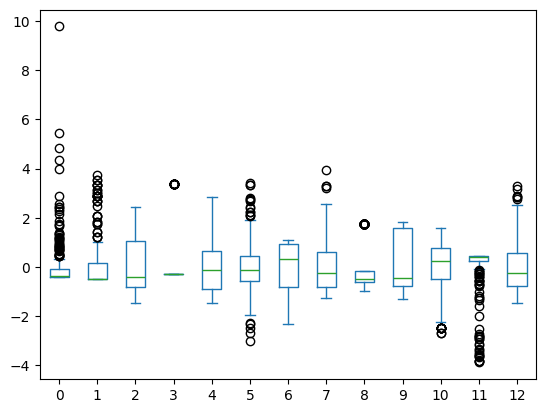

In [63]:
from sklearn.preprocessing import StandardScaler
my_scalar = StandardScaler()
X_train_scaled = my_scalar.fit_transform(X_train)

df_scaled = pd.DataFrame(X_train_scaled)
df_scaled.plot(kind='box') # Data looks nicely scaled now

### Step 5:
Use `KNeighborsRegressor()` to fit both not-scaled and scaled datasets. Check the scores of test dataset for both models.

In [69]:
from sklearn.neighbors import KNeighborsRegressor
# Fit the estimator to the non-scaled data
knr = KNeighborsRegressor()
knr.fit(X_train, y_train)
print(f'Score for KNRegressor on unscaled data is: {knr.score(X_test, y_test)}')

# Fit estimator to the scaled data
# Need to first scale the test data too
X_test_scaled = my_scalar.transform(X_test) # Don't refit your scalar to your test dataset!
knr1 = KNeighborsRegressor()
knr1.fit(X_train_scaled, y_train)
print(f'Score for KNRegressor on scaled data is: {knr1.score(X_test_scaled, y_test)}')


Score for KNRegressor on unscaled data is: 0.5365957506850885
Score for KNRegressor on scaled data is: 0.6148466404390586


### Step 6:
Repeat Step 5 for `RandomForestRegressor`. Use

`RandomForestRegressor(n_estimators=100, random_state=0)`

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(X_train, y_train)
print(f'The RF score using the model trained on unscaled data is: {rf.score(X_test, y_test)}')

rf1 = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf1.fit(X_train_scaled, y_train)
print(f'The RF score using the model trained on scaled data is: {rf1.score(X_test_scaled, y_test)}')

# Results are almost identical. RF performs much better (at least, according to accuracy) than KNR

The RF score using the model trained on unscaled data is: 0.861985027765831
The RF score using the model trained on scaled data is: 0.8619131434582473
